# Analyzing California Housing Prices Dataset (Decision Tree, Linear Regression and Random Forest)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.dropna(inplace=True)

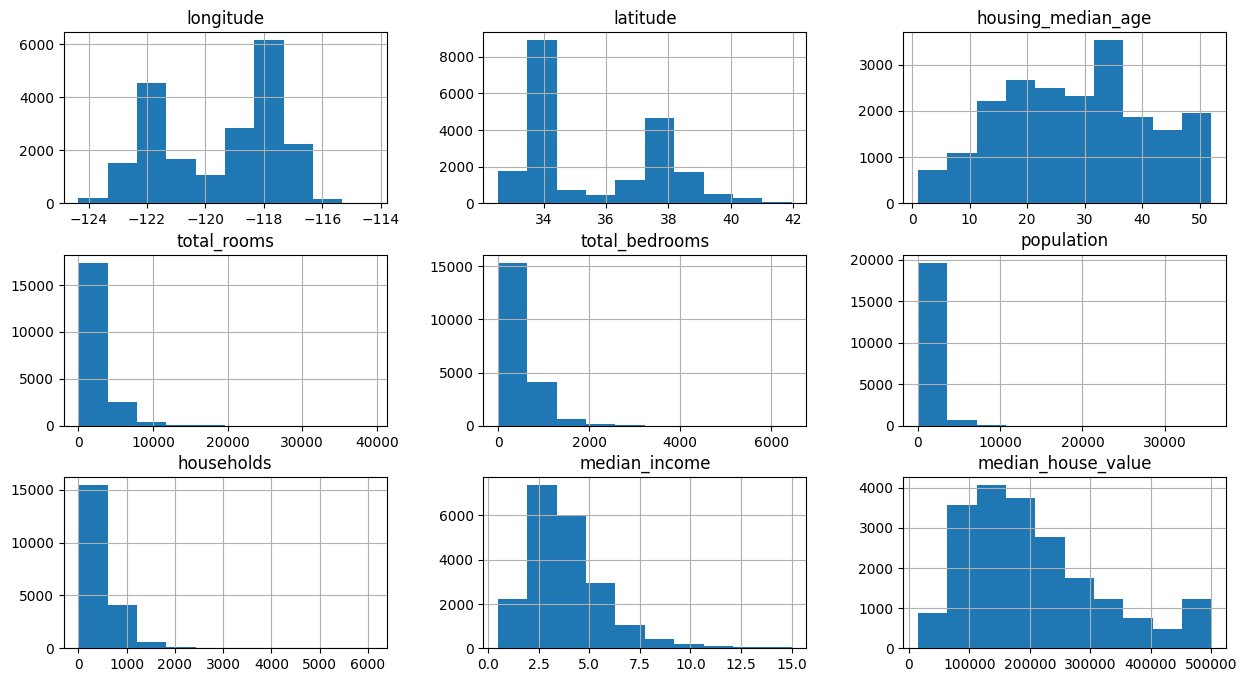

In [4]:
df.hist(figsize=(15,8));

In [5]:
corr = df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


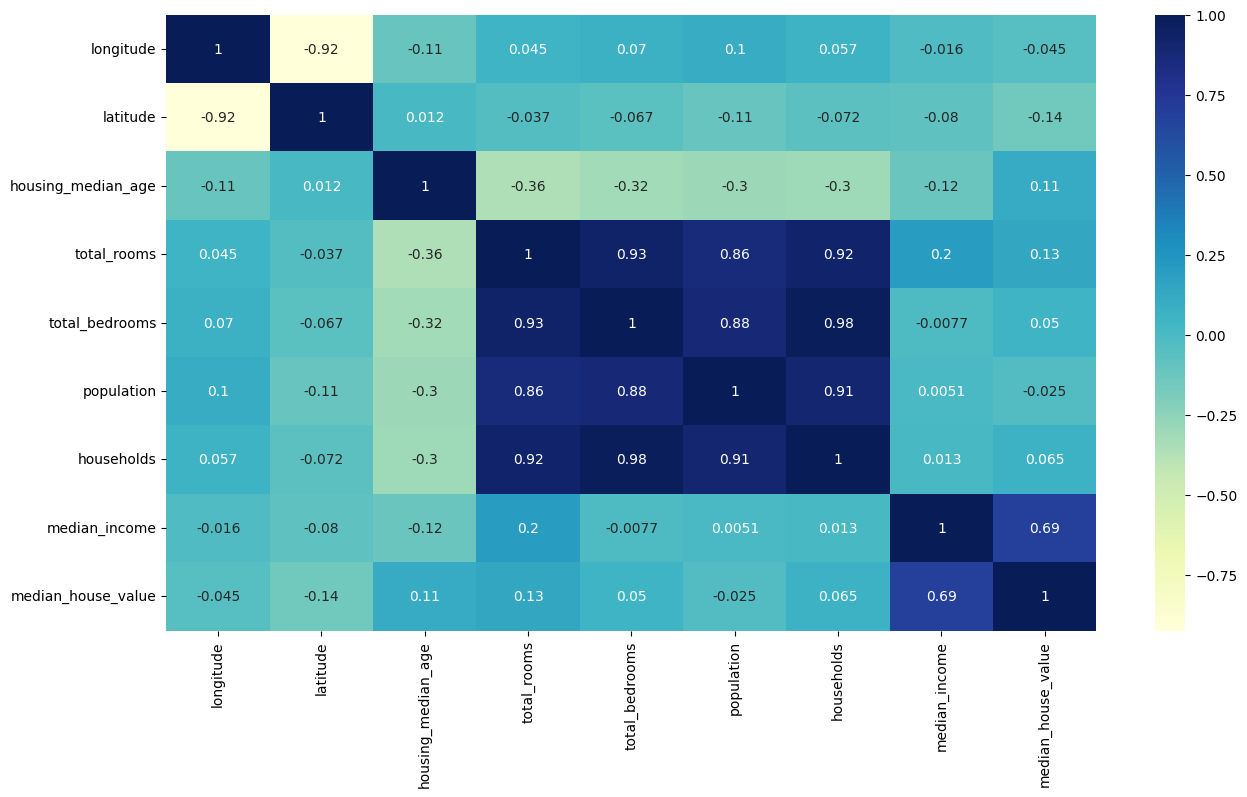

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

In [7]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


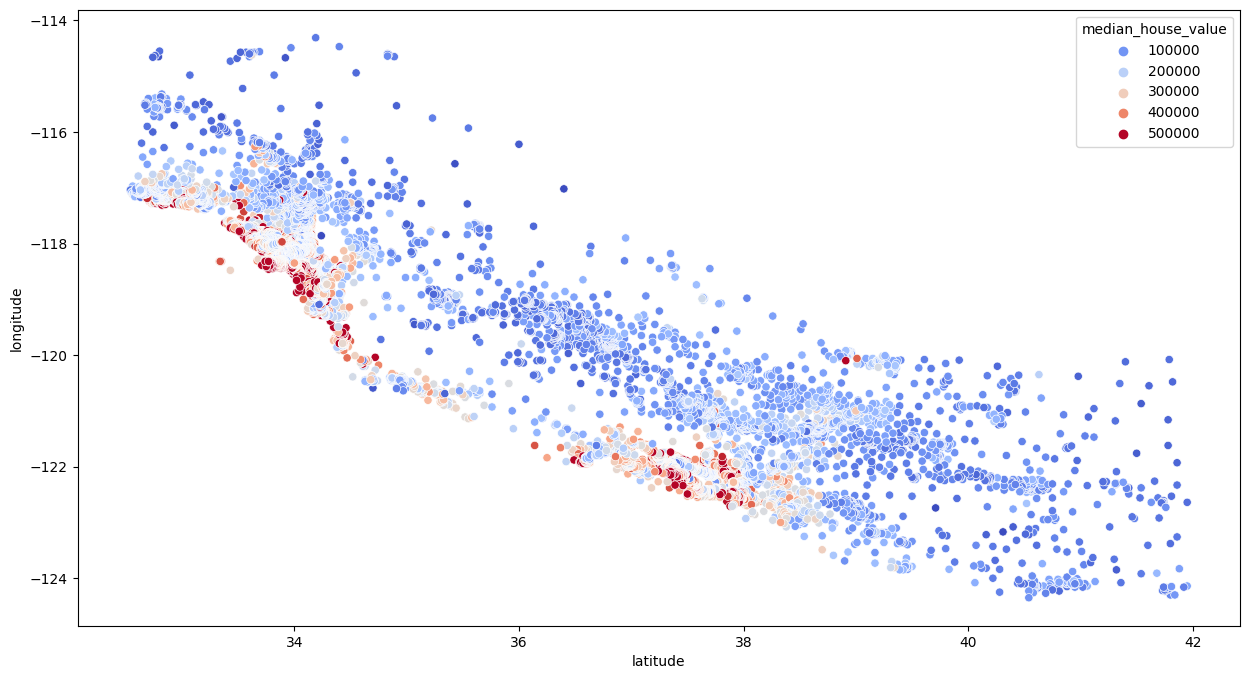

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue = 'median_house_value', palette='coolwarm');

In [9]:
from  sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis=1)
y=df['median_house_value']

In [10]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [12]:
reg.score(X_test,y_test)

0.6438200037553639

In [13]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train,y_train)



RandomForestRegressor()

In [14]:
random.score(X_test,y_test)

0.8226255078728367

# GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV
random = RandomForestRegressor()
param  = {
    "n_estimators": [3,10,30],
    "min_samples_split": [2,4,6,8],
    
    
}
grid_search = GridSearchCV(random, param, cv=5,n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [16]:
best_random = grid_search.best_estimator_
best_random

RandomForestRegressor(min_samples_split=4, n_estimators=30)

In [17]:
best_random.score(X_test,y_test)

0.8198154813460851

In [18]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
decision_tree.score(X_test,y_test)

0.6319230023816923

**Conclusion**

In this case, optimizing the model did not yield the desired results as the score is not improved. The score can be enhanced by using changing the used params and also changing their values for getting optimum score. The project includes the use of linear regression, Random Forest Regressor and Decison Tree Regressor for developing ML models in studying the California House Prices Dataset which is taken form Kaggle.com. The missing values occupy a small portion and were removed. The EDA is performed for understanding the data and drawing useful insights. The heatmap and scatterplot are used for this purpose using the Seaborn visualization library. Random Forest Regressor gave the best score with a value of 0.82.